<h1 align="center"> HR Analysis, Prediction and Visualization </b> </h1><br>
<img src=https://blueprintbusinesssolutionscorp.com/wp-content/uploads/2017/12/attrition.png>


In [3]:
!pip install numpy

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.6 MB 11.8 MB/s eta 0:00:01
   --------------- ------------------------ 5.0/12.6 MB 11.7 MB/s eta 0:00:01
   ----------------------- ---------------- 7.3/12.6 MB 11.7 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  12.3/12.6 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 11.2 MB/s eta 0:00:00


In [4]:
!pip install pandas matplotlib

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.5 MB 11.7 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.5 MB 11.8 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.5 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 11.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 10.8 MB/s eta 0:00:00
   -------------

In [5]:
!pip install seaborn


In [6]:
!pip install pandas

In [7]:
clear


In [8]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [10]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [11]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
260,32,No,Travel_Frequently,1311,Research & Development,7,3,Life Sciences,1,359,2,Male,100,4,1,Laboratory Technician,2,Married,2794,26062,1,Y,No,20,4,3,80,0,5,3,1,5,1,0,3
734,22,No,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,2,Male,94,1,1,Laboratory Technician,1,Married,2451,6881,1,Y,No,15,3,1,80,1,4,3,2,4,3,1,1
421,29,Yes,Travel_Rarely,408,Research & Development,25,5,Technical Degree,1,565,3,Female,71,2,1,Research Scientist,2,Married,2546,18300,5,Y,No,16,3,2,80,0,6,2,4,2,2,1,1
290,49,No,Travel_Frequently,636,Research & Development,10,4,Life Sciences,1,396,3,Female,35,3,5,Research Director,1,Single,18665,25594,9,Y,Yes,11,3,4,80,0,22,4,3,3,2,1,2
389,37,No,Travel_Rarely,1305,Research & Development,10,4,Life Sciences,1,518,3,Male,49,3,2,Manufacturing Director,2,Single,4197,21123,2,Y,Yes,12,3,4,80,0,18,2,2,1,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [15]:
numeric_df = df.select_dtypes(include=['number'])

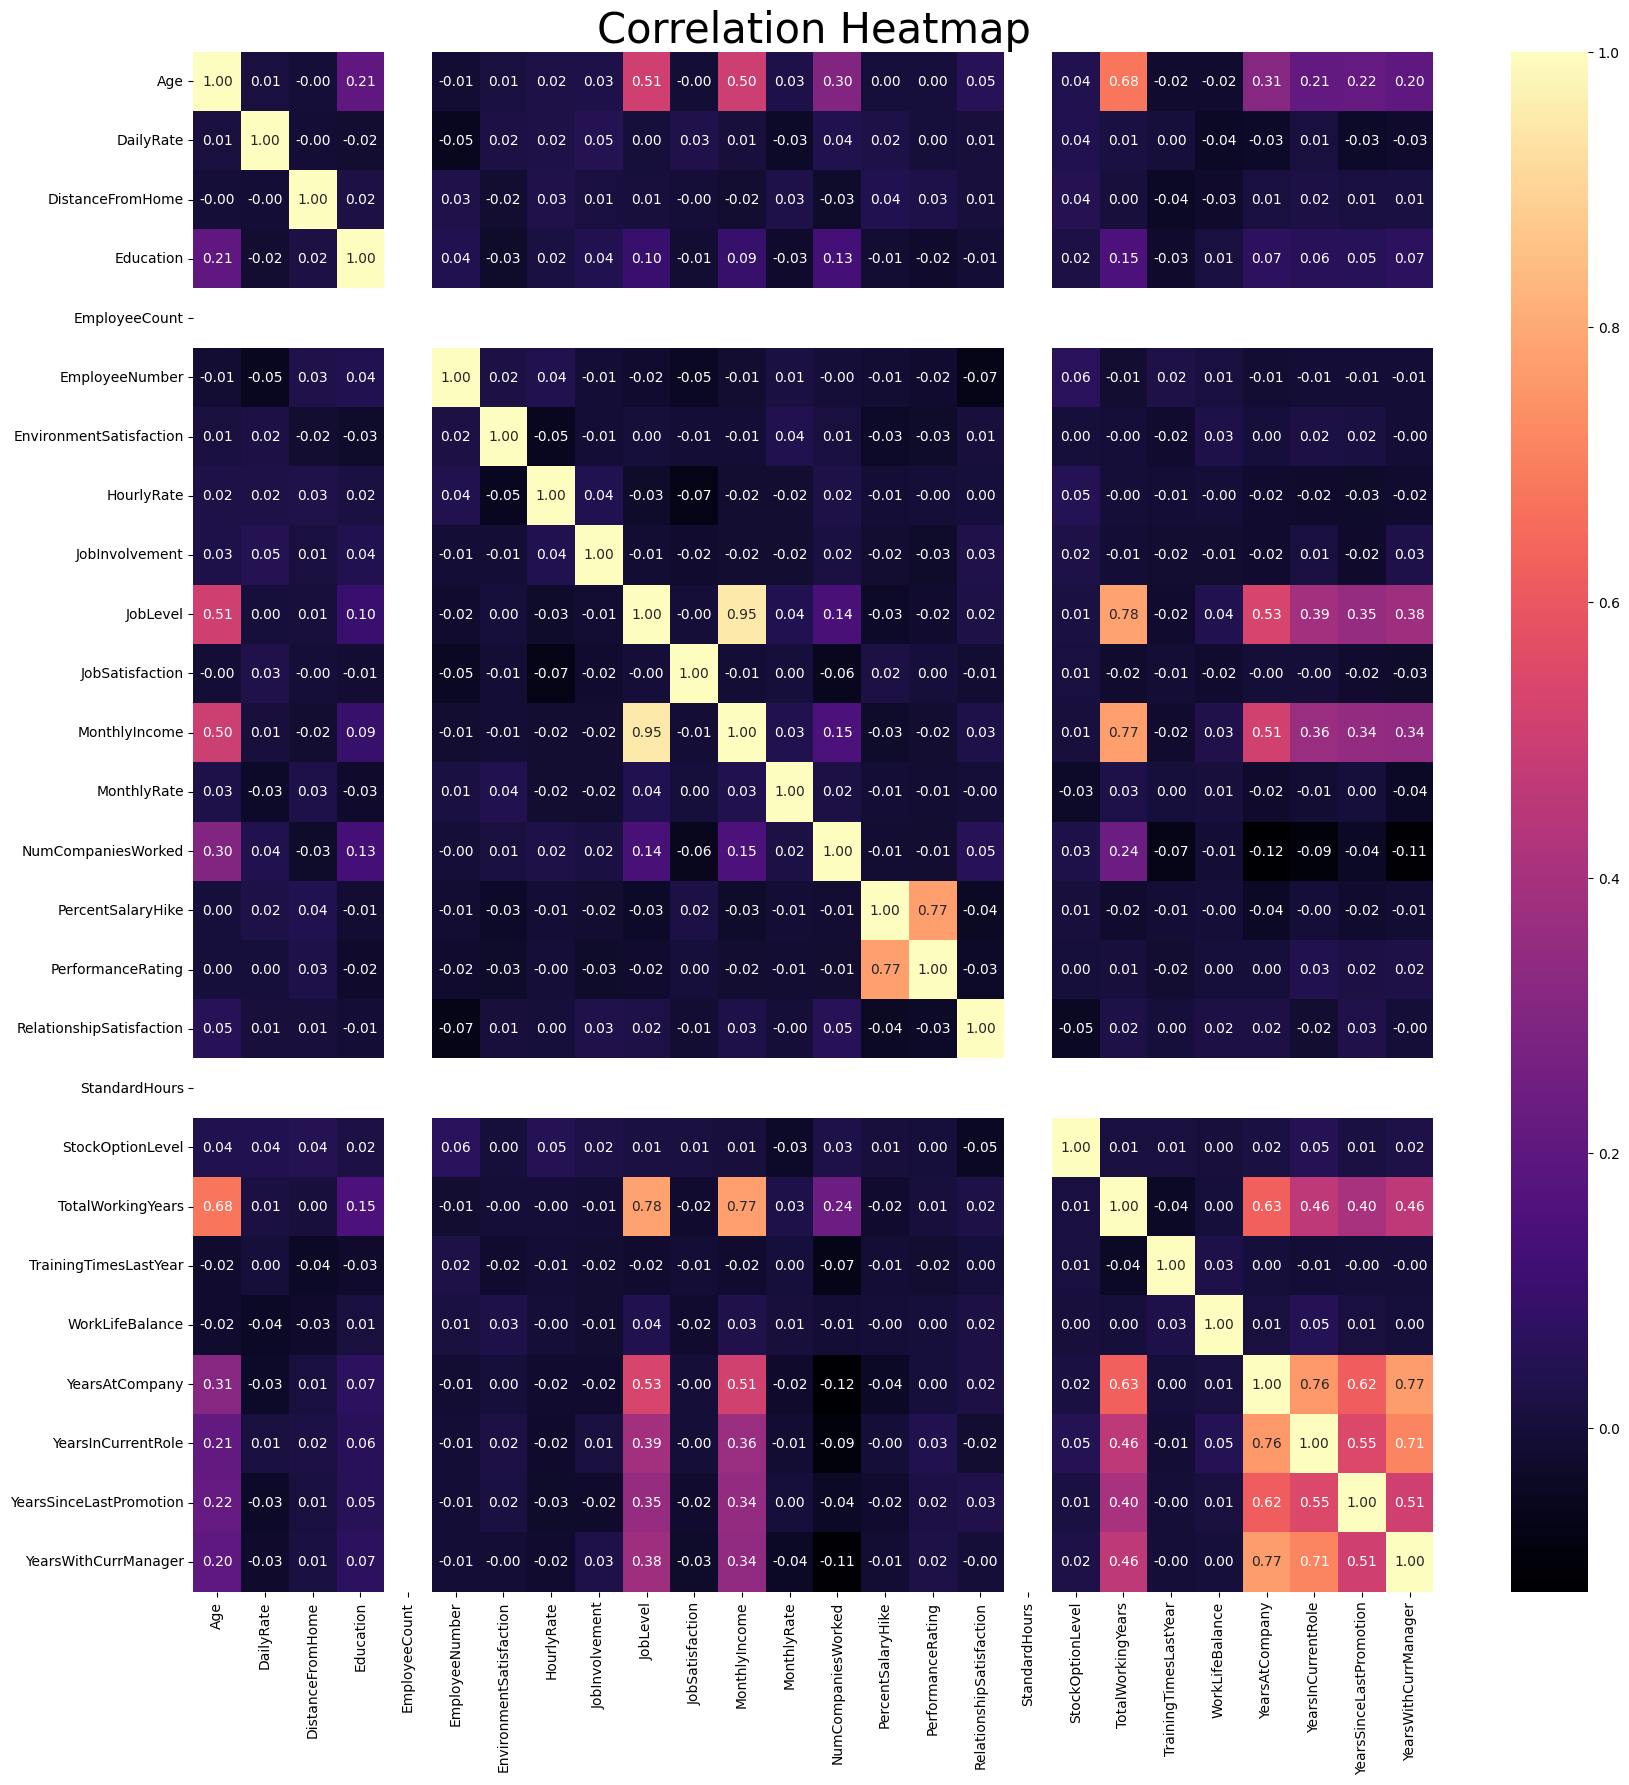

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

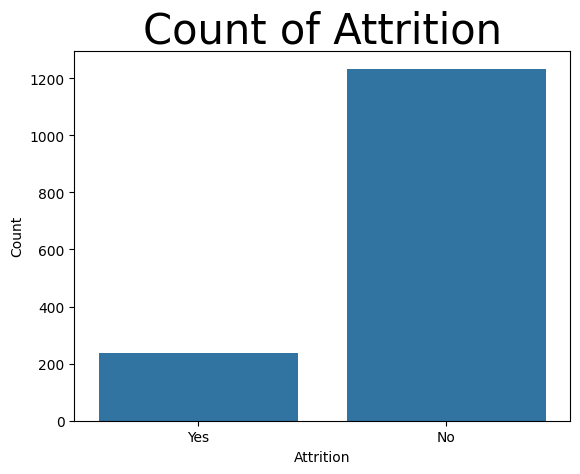

In [18]:
sns.countplot(x='Attrition', data=df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [19]:

categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1445,No,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Y,No
1107,No,Travel_Frequently,Human Resources,Human Resources,Male,Human Resources,Married,Y,No
1469,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1224,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
115,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Single,Y,No


In [20]:

numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
364,37,921,10,3,1,486,3,98,3,1,1,3452,17663,6,20,4,2,80,1,17,3,3,5,4,0,3
1130,35,750,28,3,1,1596,2,46,4,2,3,3407,25348,1,17,3,4,80,2,10,3,2,10,9,6,8
1404,42,335,23,2,1,1976,4,37,2,2,3,4332,14811,1,12,3,4,80,0,20,2,3,20,9,3,7
983,34,404,2,4,1,1383,3,98,3,2,4,6687,6163,1,11,3,4,80,0,14,2,4,14,11,4,11
40,35,464,4,2,1,53,3,75,3,1,4,1951,10910,1,12,3,3,80,1,1,3,3,1,0,0,0


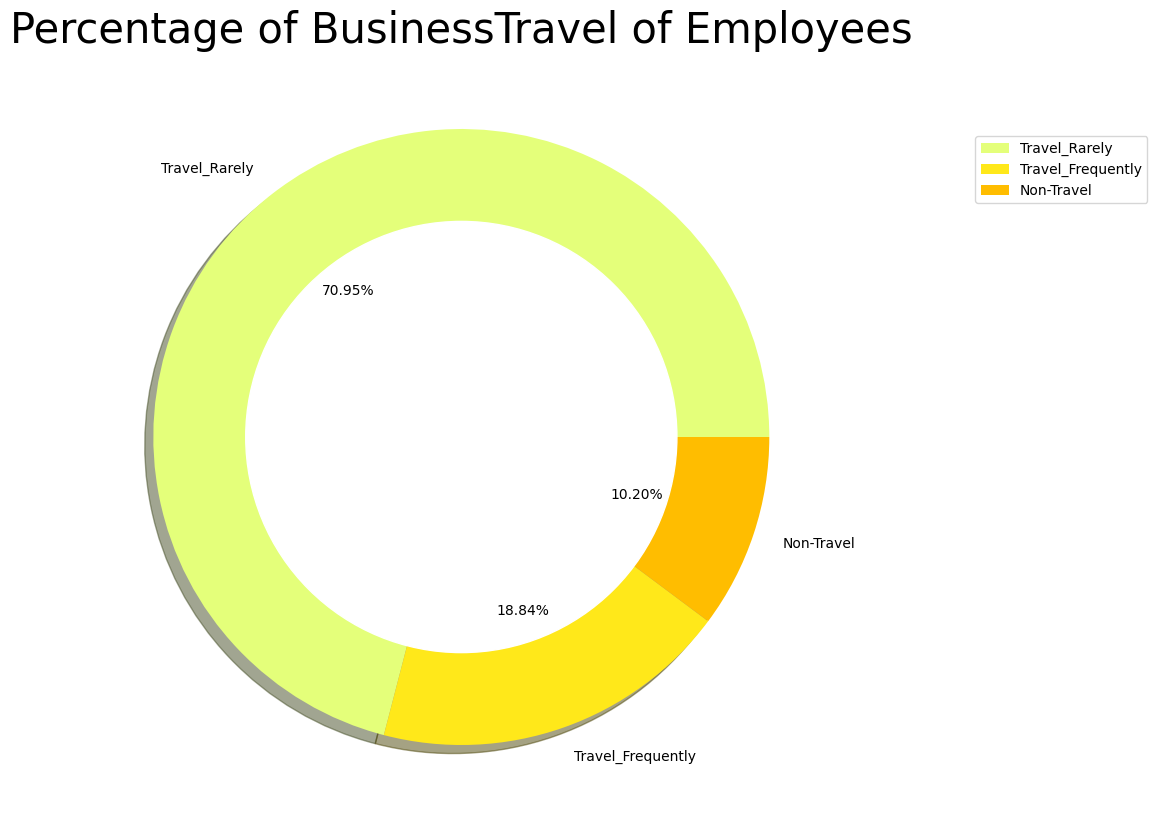

In [21]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

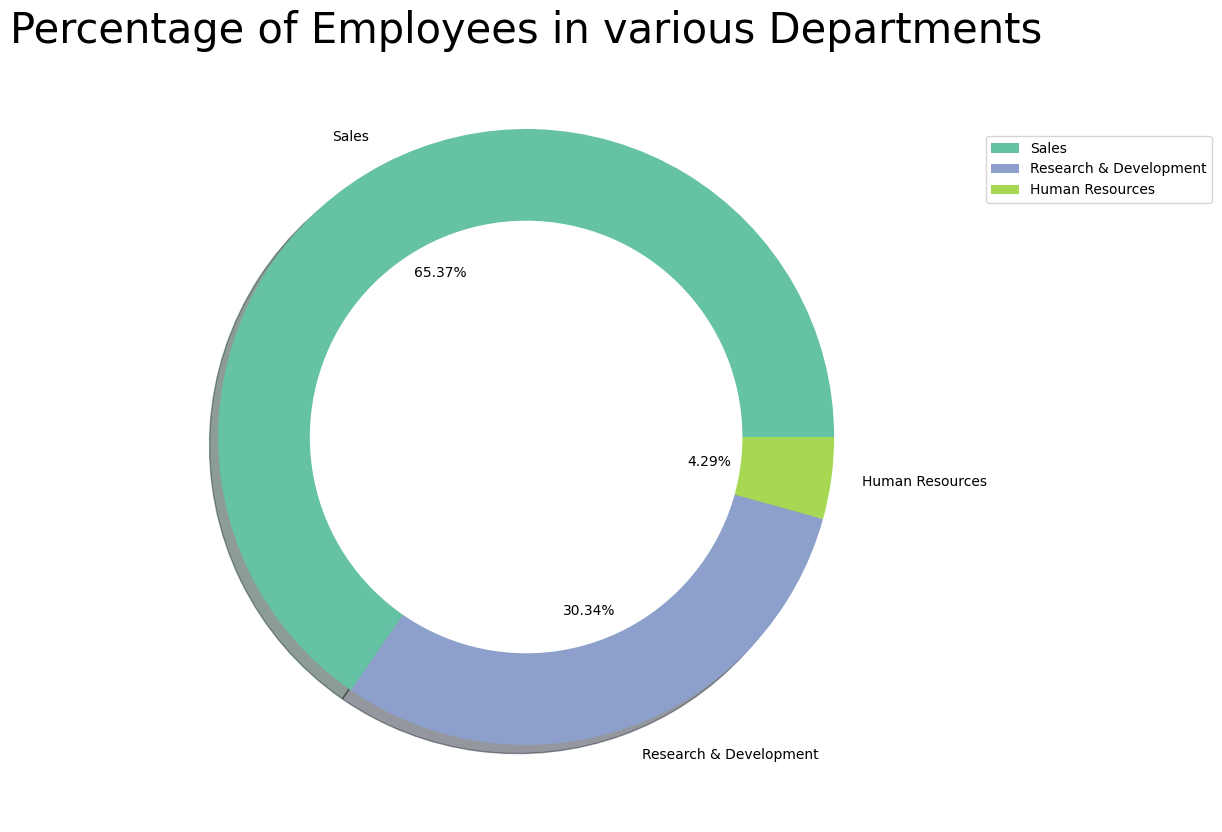

In [22]:

size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

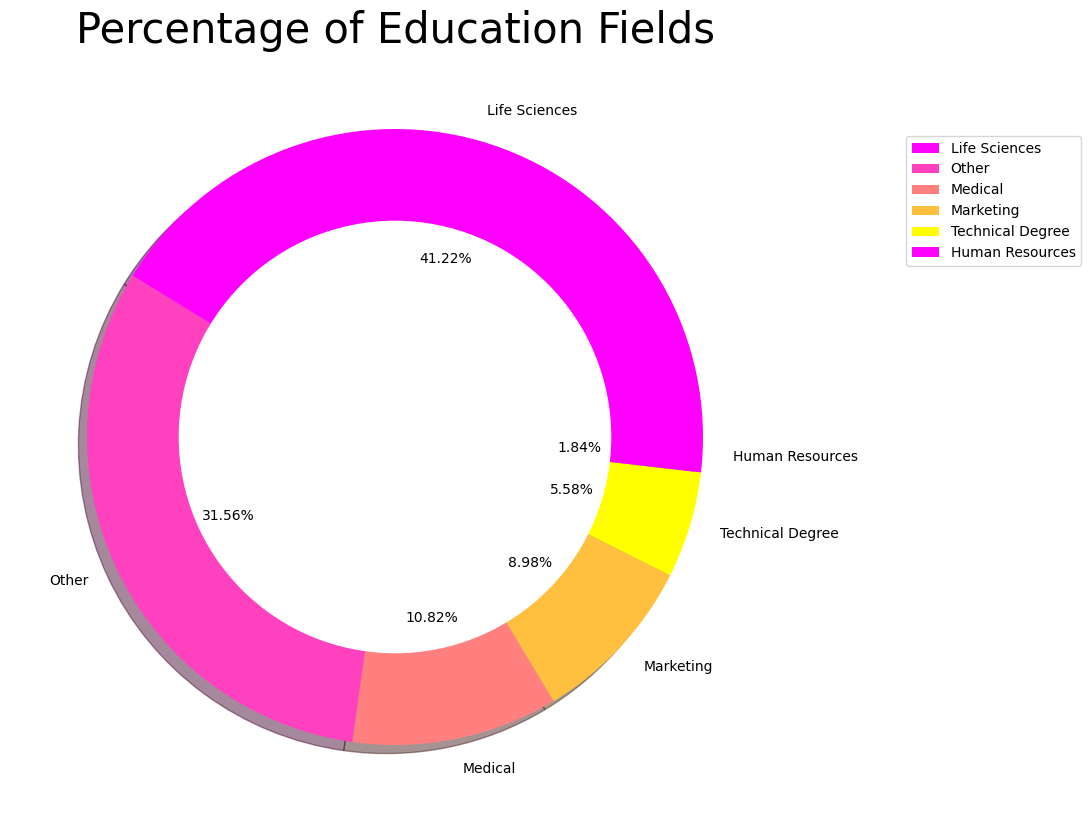

In [23]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

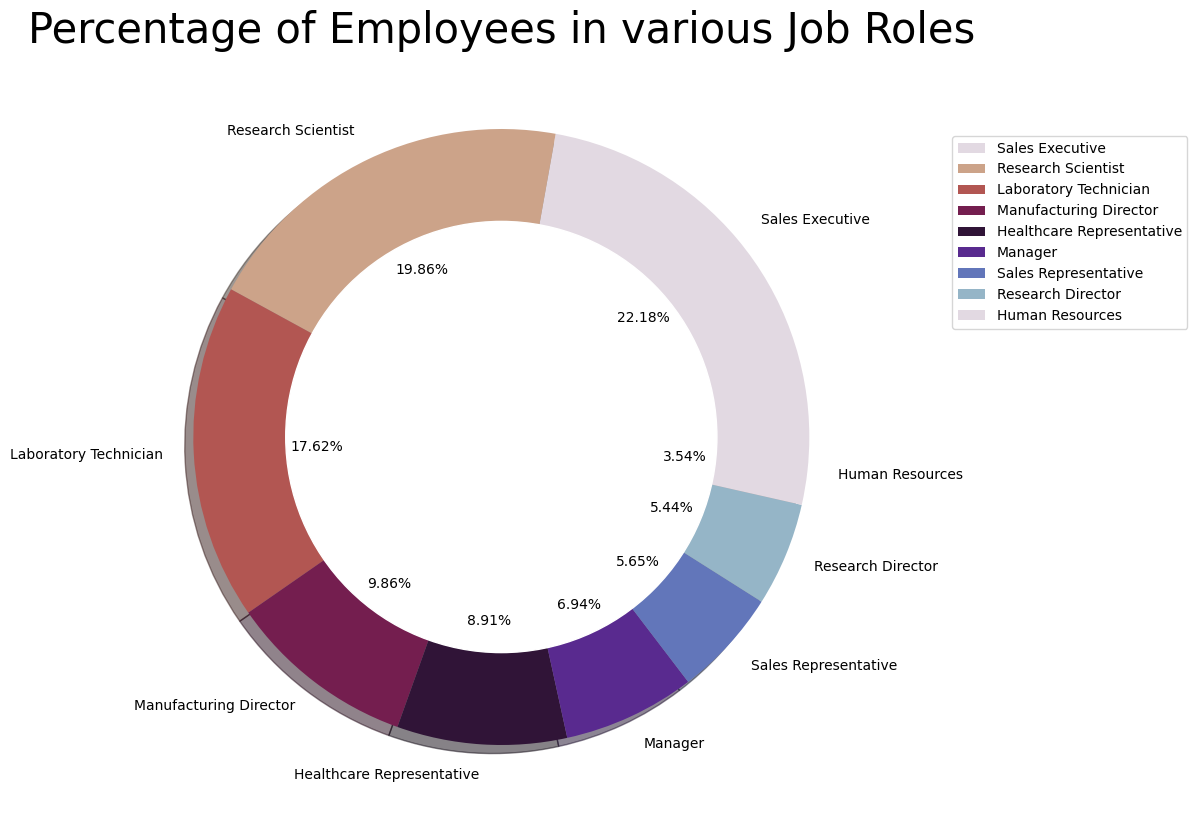

In [24]:

size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

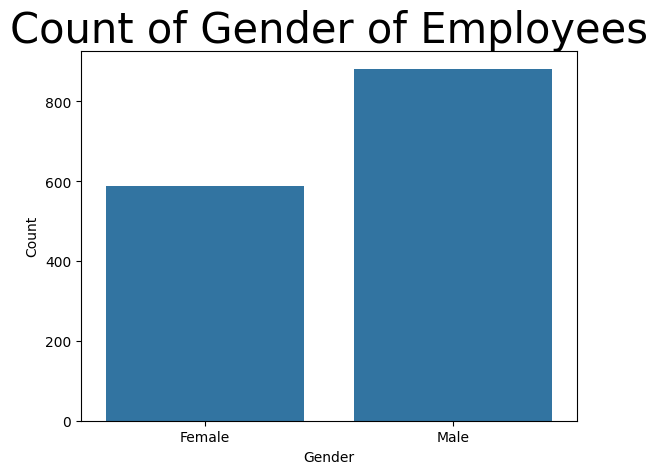

In [26]:
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.ylabel('Count')  # Adding ylabel for clarity
plt.show()

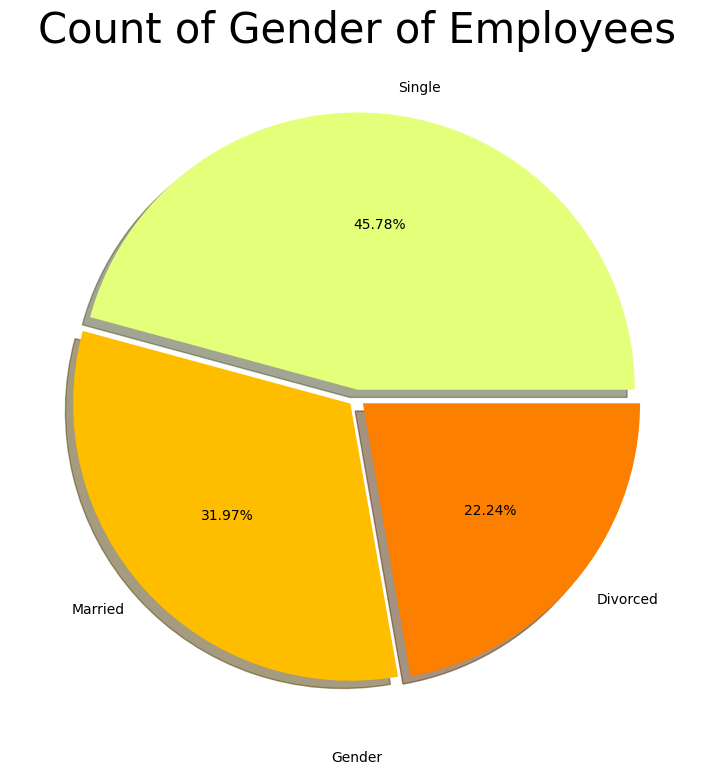

In [27]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

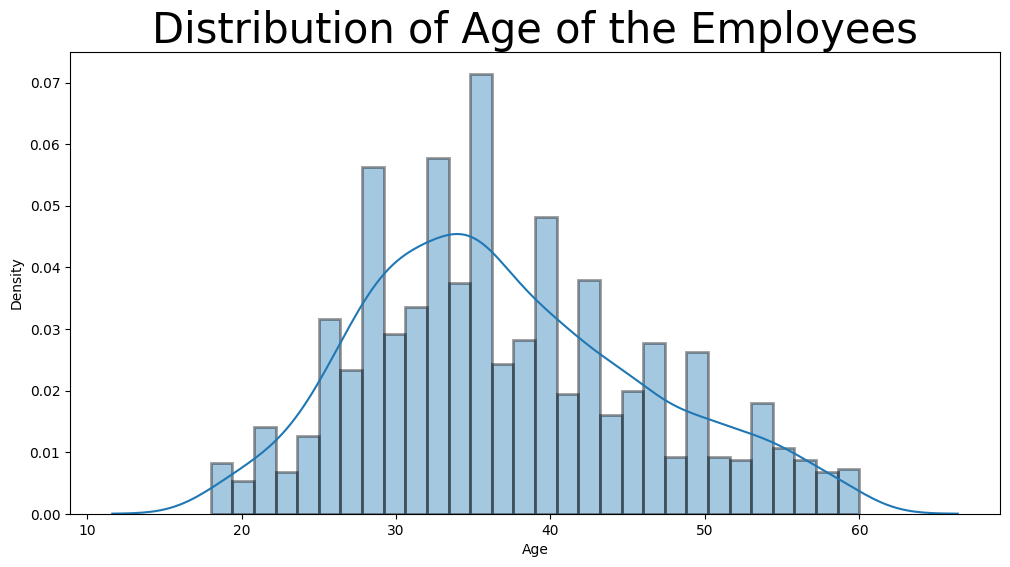

In [28]:

plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()

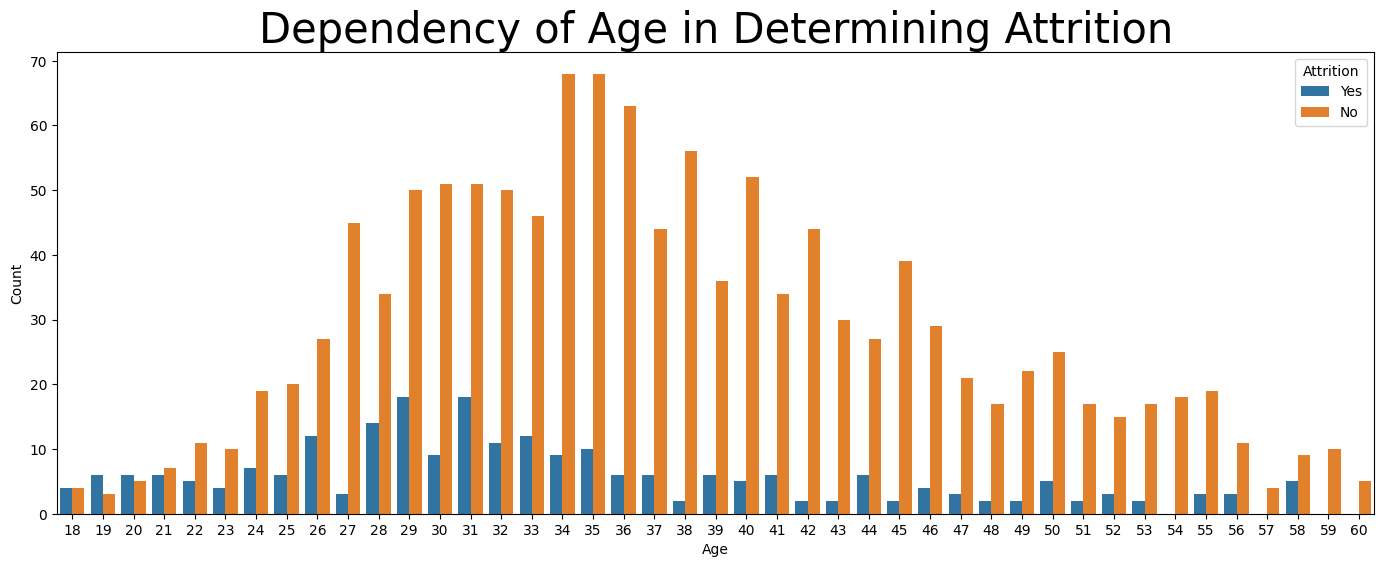

In [30]:
plt.figure(figsize=(17, 6))
# Use x and hue arguments
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Dependency of Age in Determining Attrition', fontsize=30)
plt.xlabel('Age')
plt.ylabel('Count')  # Adding ylabel for clarity
plt.show()

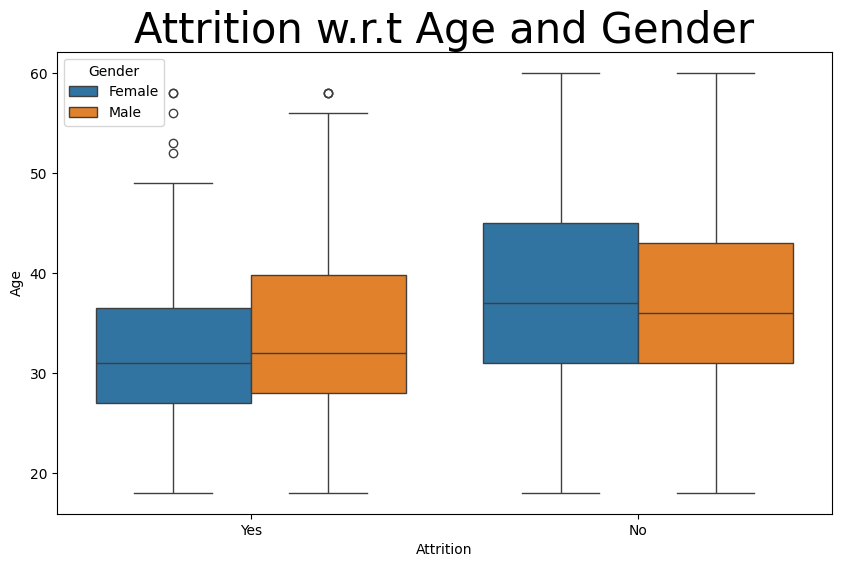

In [32]:
plt.figure(figsize=(10, 6))
# Use x, y, and hue arguments
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=df)
plt.title('Attrition w.r.t Age and Gender', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Age')  # Adding ylabel for clarity
plt.show()

<Figure size 1900x600 with 0 Axes>

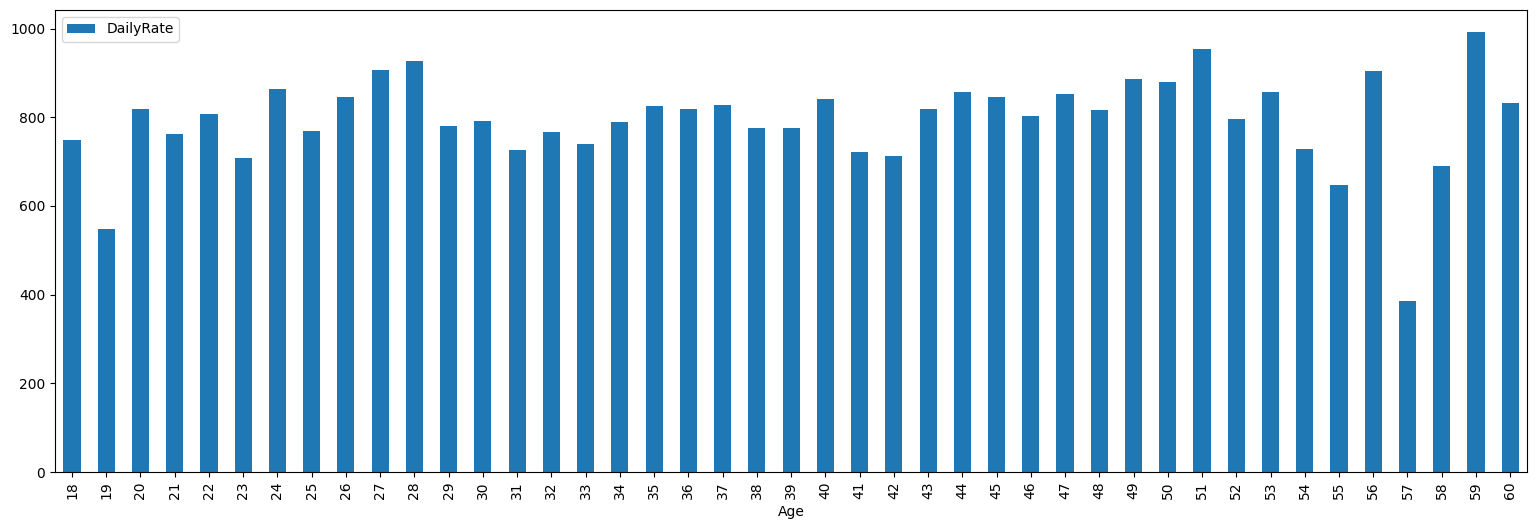

In [33]:

plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

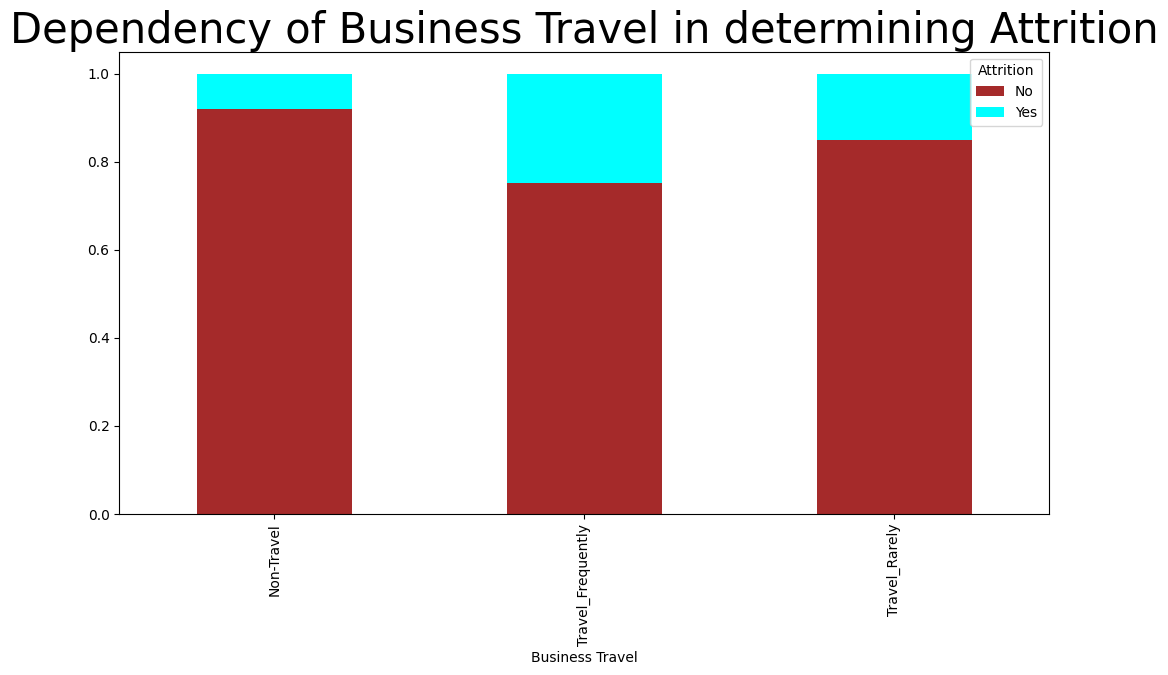

In [34]:

data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

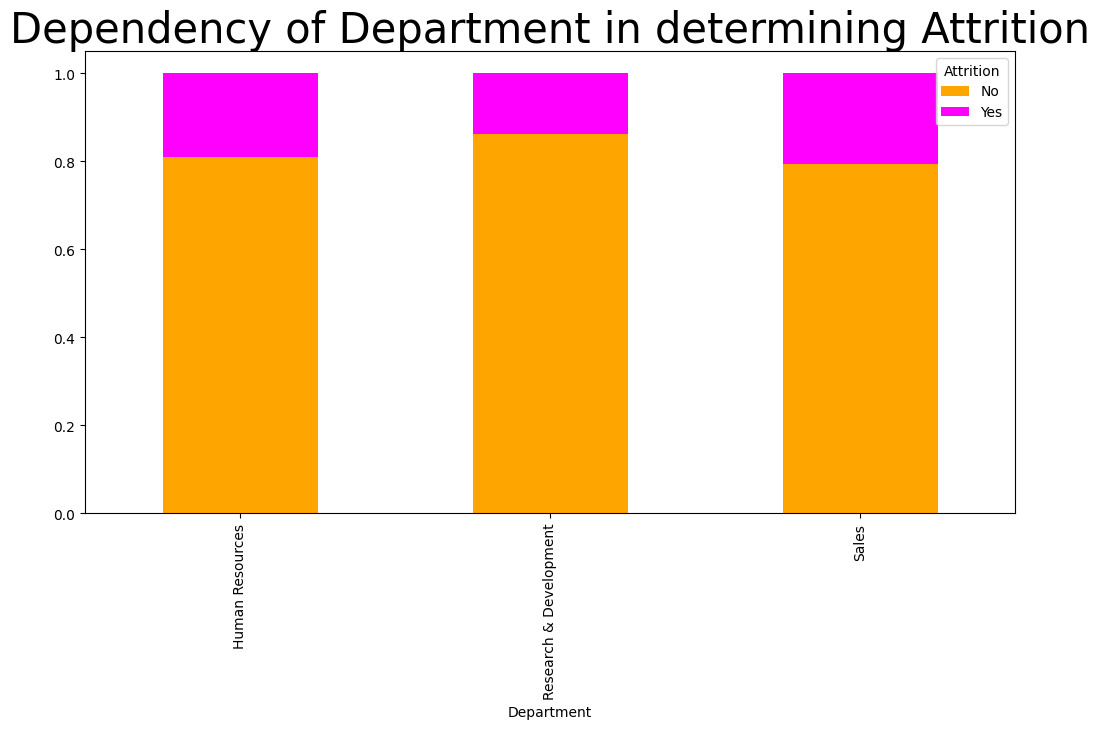

In [35]:

data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

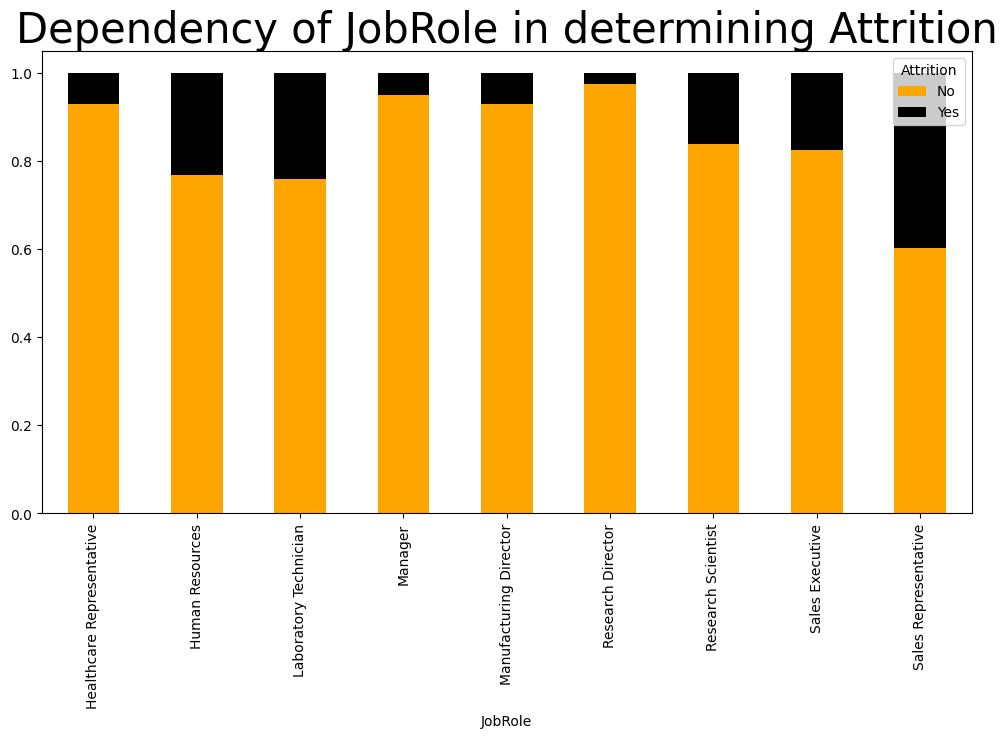

In [36]:

data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

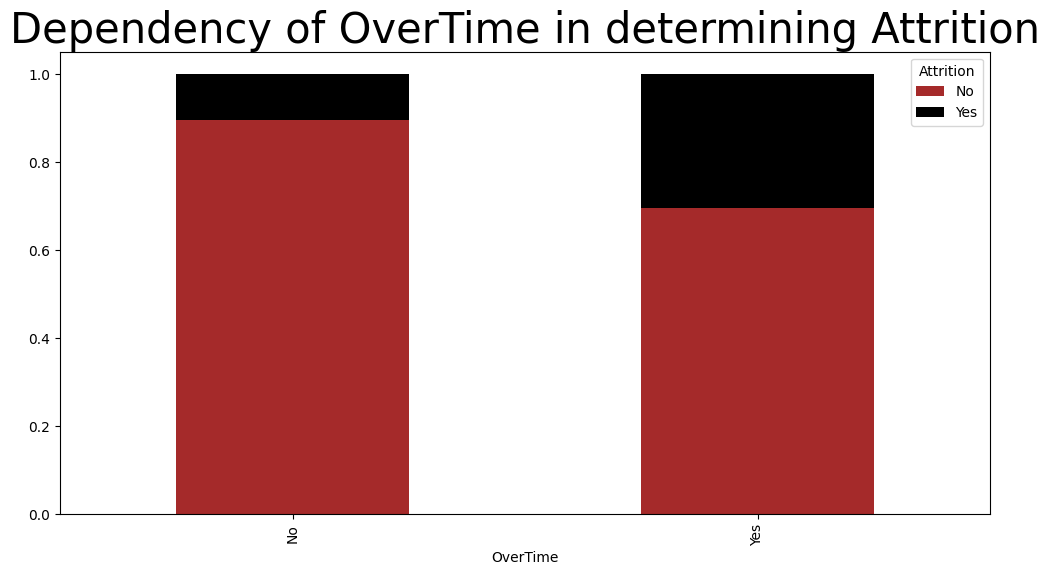

In [37]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

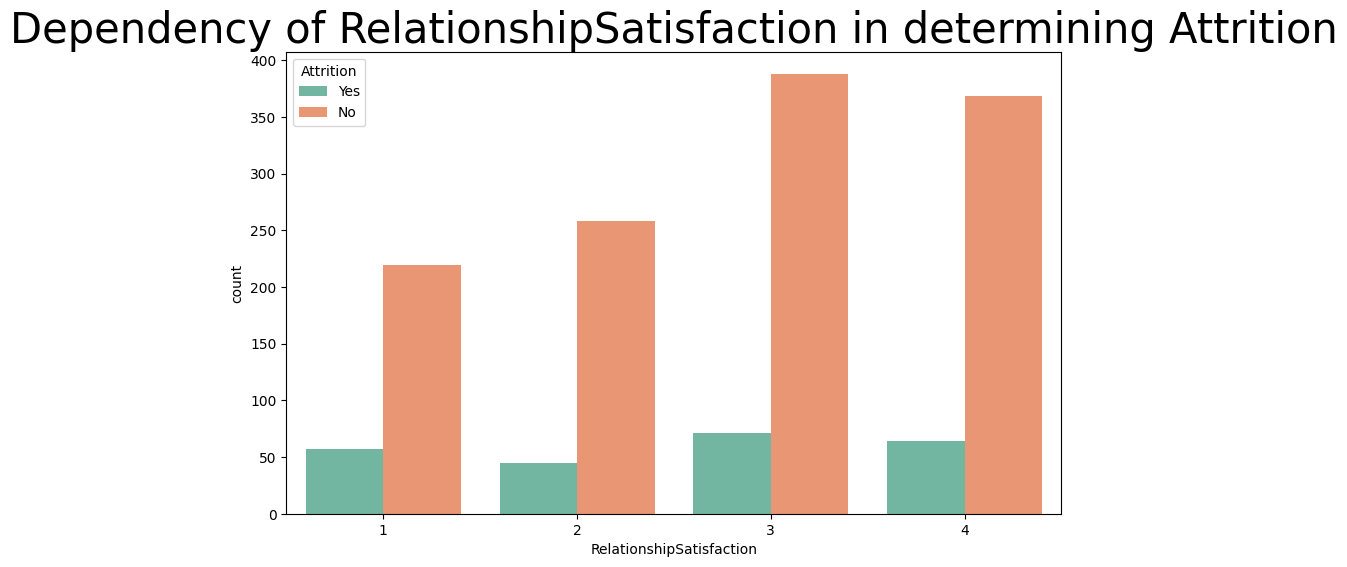

In [39]:

plt.figure(figsize=(10,6))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

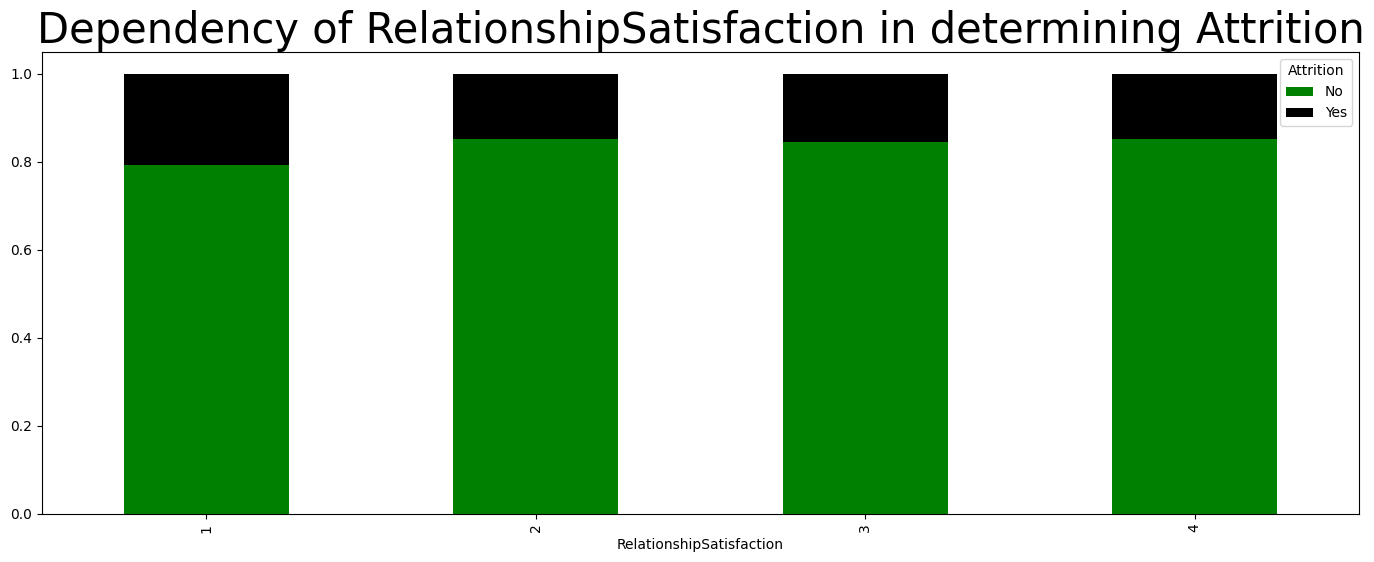

In [40]:

data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

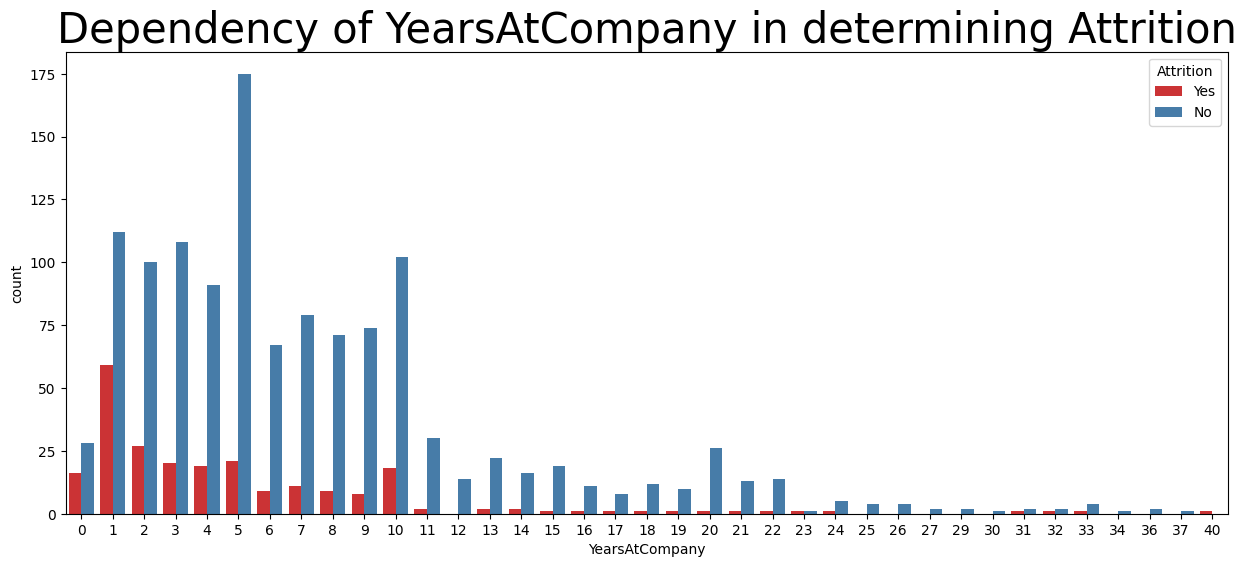

In [42]:

plt.figure(figsize=(15,6))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

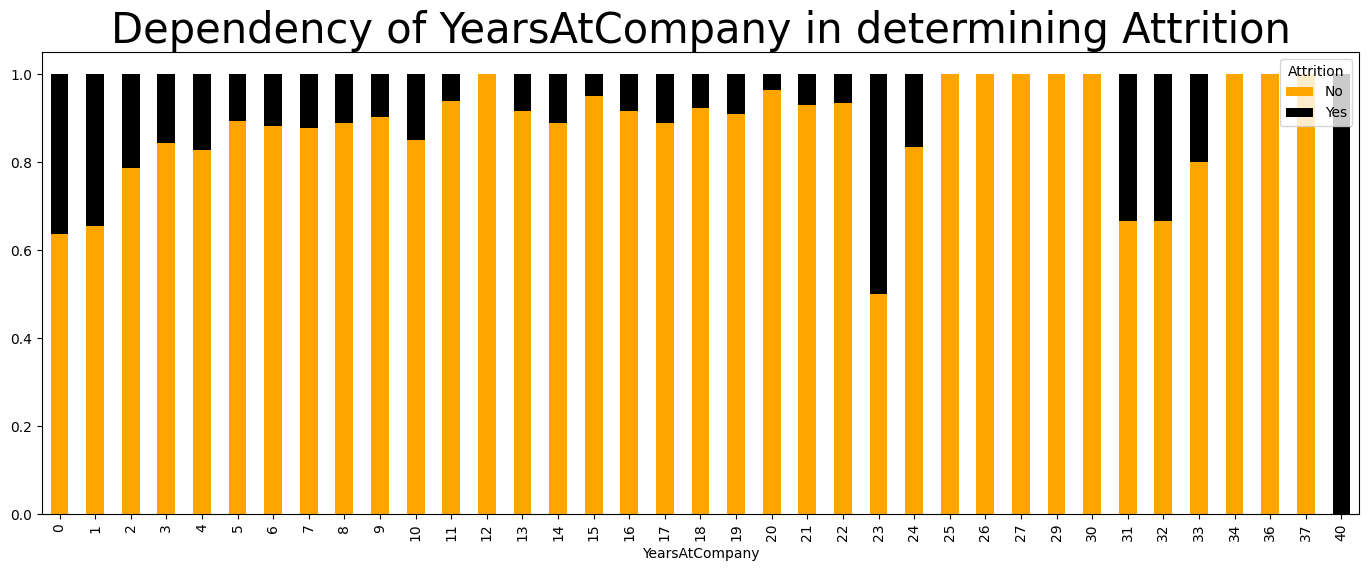

In [43]:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

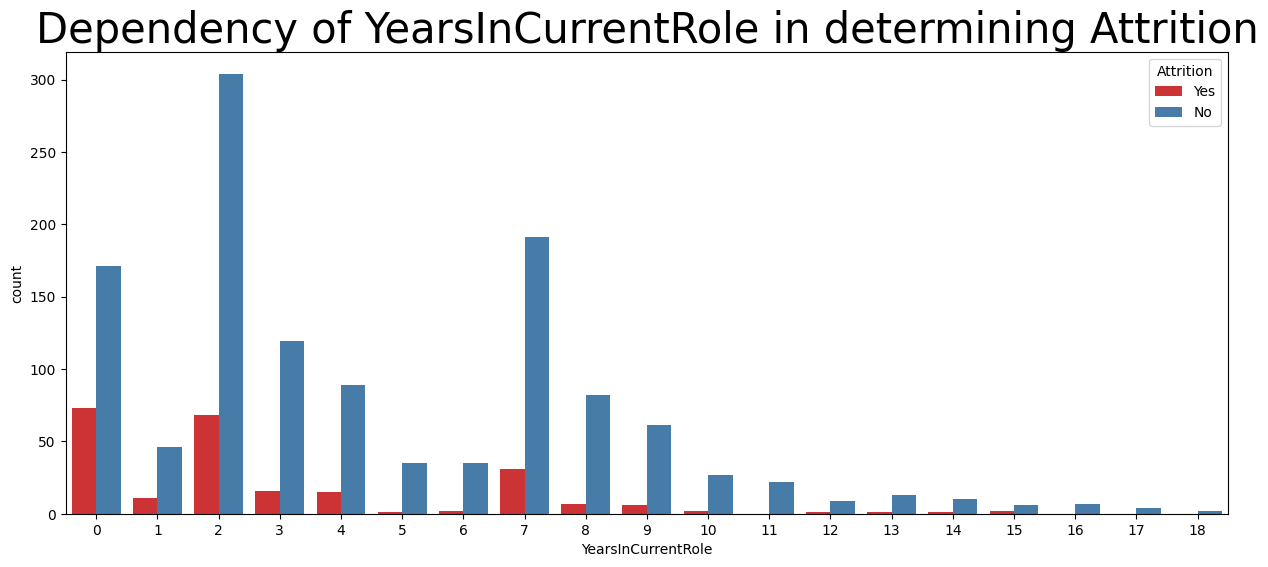

In [45]:

plt.figure(figsize=(15,6))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

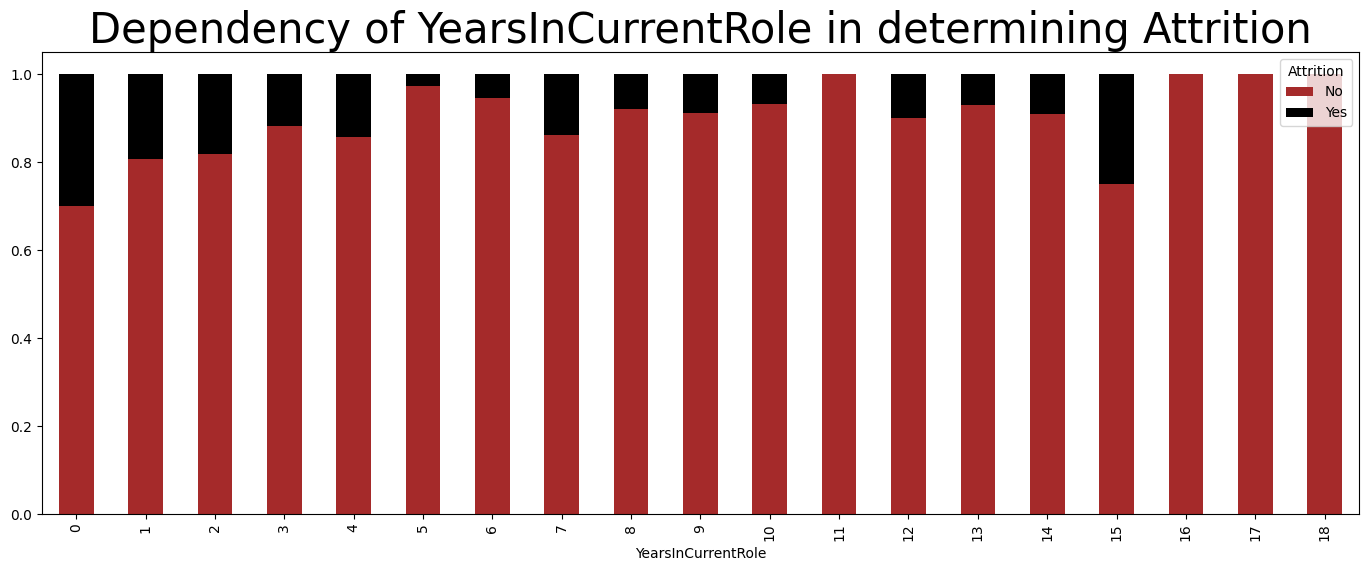

In [46]:

data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

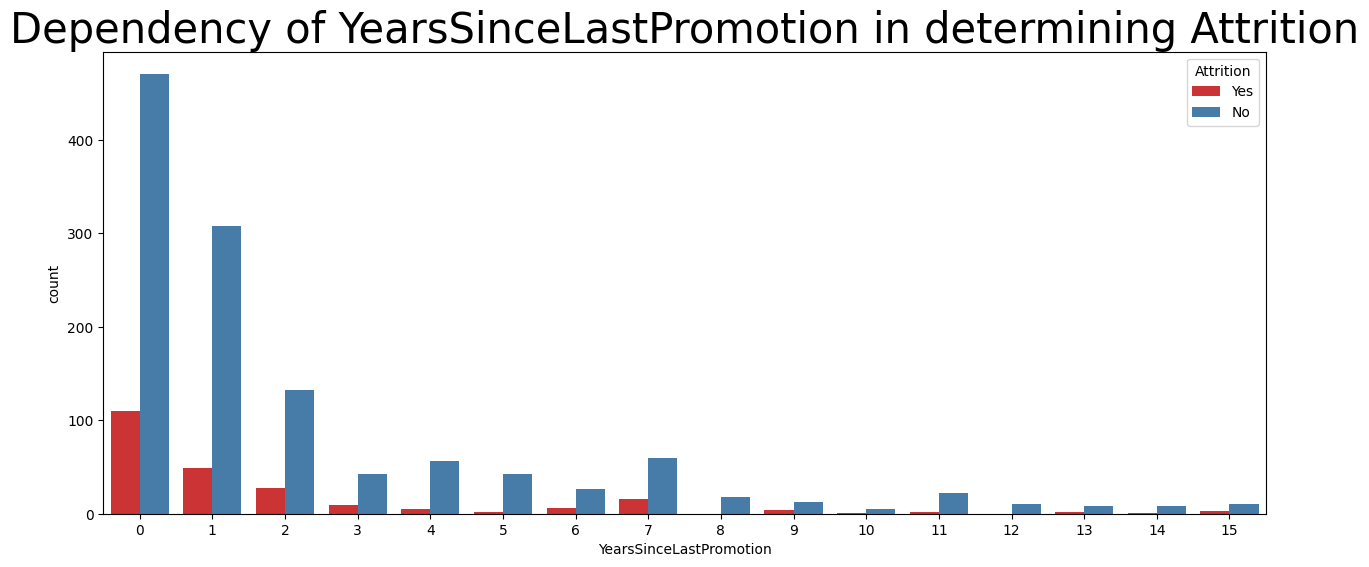

In [47]:

plt.figure(figsize=(15,6))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

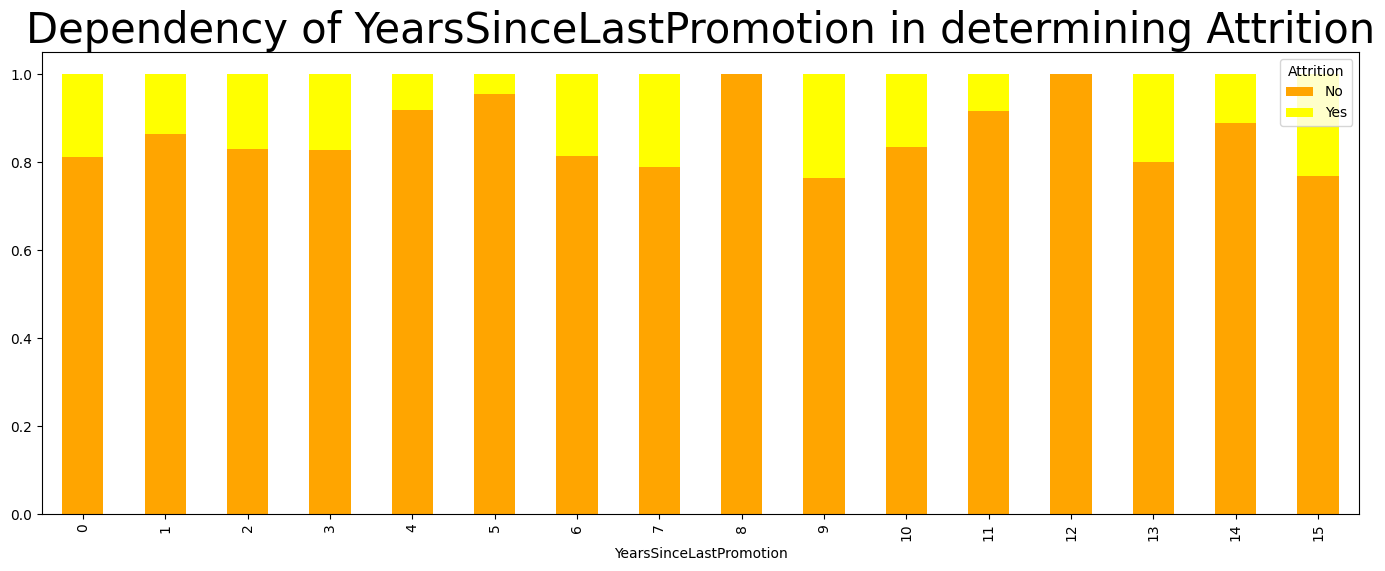

In [48]:
data=pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

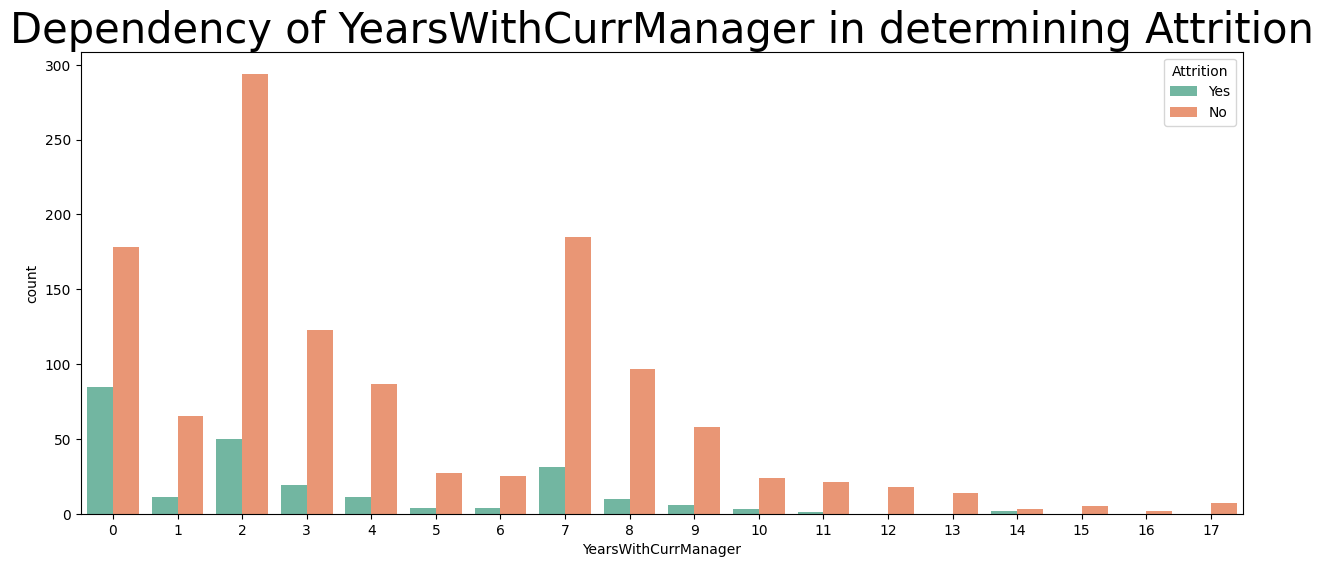

In [49]:

plt.figure(figsize=(15,6))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

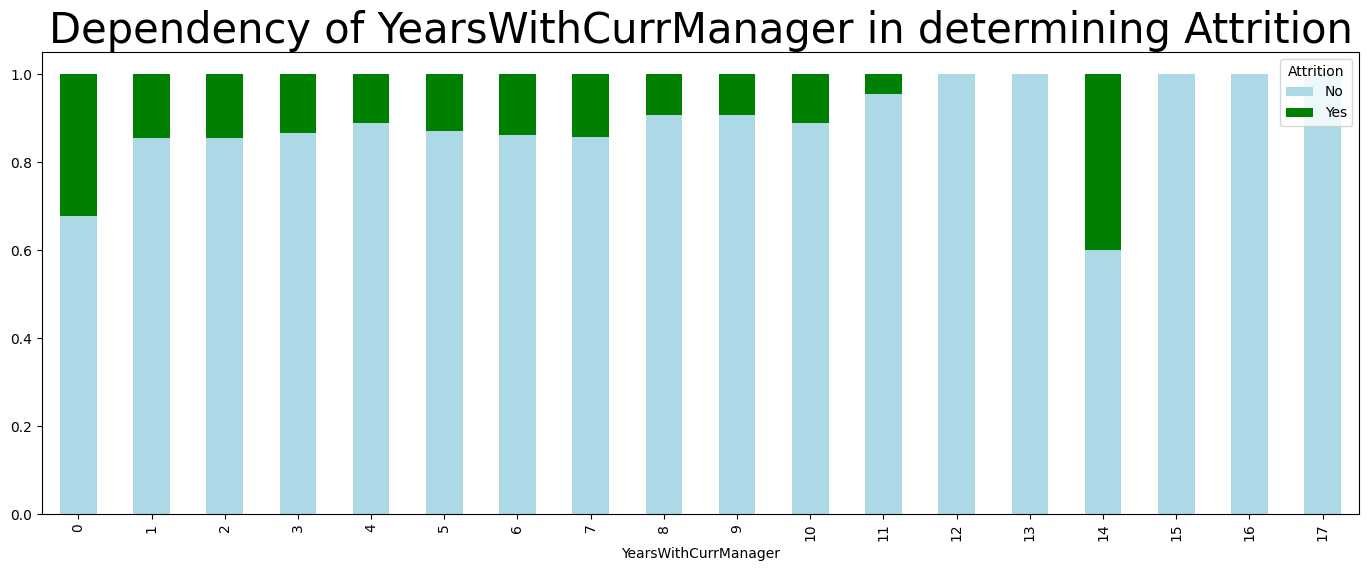

In [50]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

# Analysis Conclusion :


### Top Reasons why Employees leave the Organization:

1. No Overtime This was a surpirse, employees who don't have overtime are most likely to leave the 
    organization. This could be that employees would like to have a higher amount of income or employees could 
    feel that they are underused.
    

2. Monthly Income: As expected, Income is a huge factor as why employees leave the organization in search for
    a better salary.
    

3. Age: This could also be expected, since people who are aiming to retire will leave the organization. 

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.